In [1]:
import numpy as np
import matplotlib.pyplot as plt

from linear_models import LinearRegressor, RidgeRegressor
from utils import polynomial_features, add_bias_feature

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
%matplotlib inline

In [38]:
a = np.array([[-1, 2, 1],
              [2, 2, 2],
              [1, 3, 2],
              [1, 3, 2]])
b = np.array([[1, 1, 1]])
np.delete(a, 1, axis=0)
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.linalg.norm(a - b, axis=-1)

array([2.23606798, 1.73205081, 2.23606798, 2.23606798])

In [2]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(X[0, 0], X[-1, 0], 500)[:, np.newaxis]
y = 2*np.ravel(X)

y[::2] += 3 * (0.5 - np.random.rand(20))

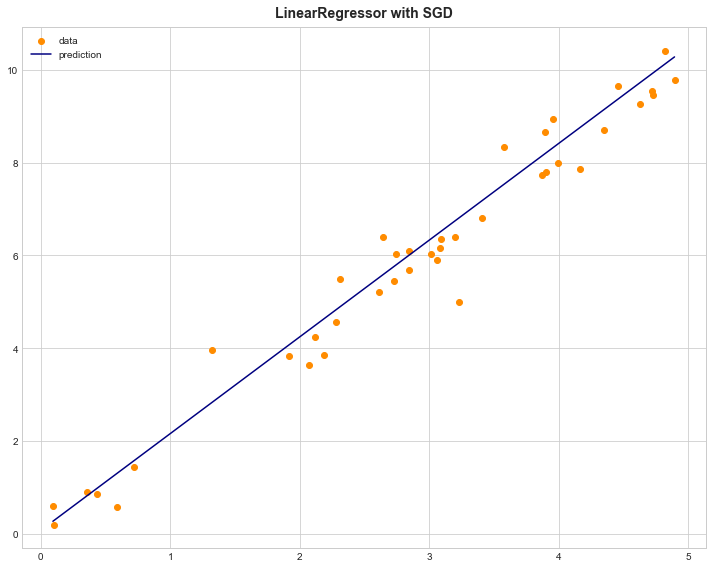

In [3]:
fig = plt.figure(figsize=(10,8))
model = LinearRegressor(method="sgd", epochs=100, eta=0.01)
model.fit(X, y)

y_ = model.predict(T)

plt.scatter(X, y, color="darkorange", label="data")
plt.plot(T, y_, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("LinearRegressor with SGD")
plt.show()

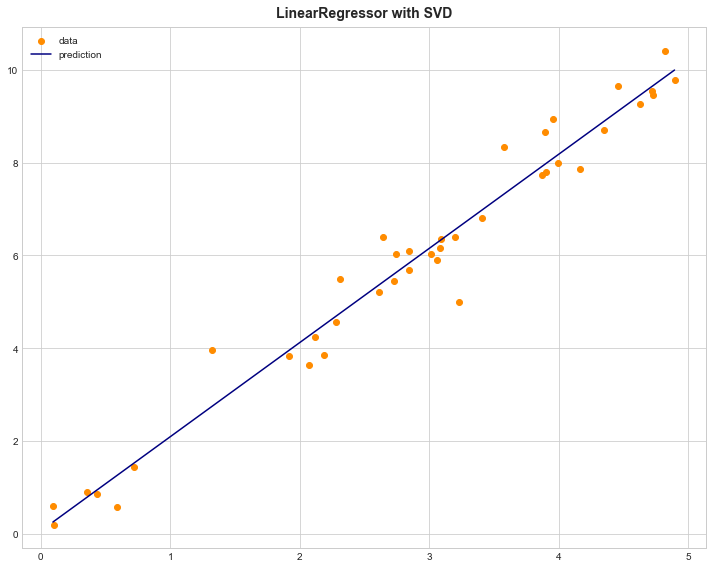

In [4]:
fig = plt.figure(figsize=(10,8))
model = LinearRegressor(method="svd")
model.fit(X, y)

y_ = model.predict(T)

plt.scatter(X, y, color="darkorange", label="data")
plt.plot(T, y_, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("LinearRegressor with SVD")
plt.show()

In [5]:
np.random.seed(1)
X = np.sort(5 * np.random.rand(20, 1), axis=0)
T = np.linspace(X[0, 0], X[-1, 0], 500)[:, np.newaxis]
y = 2 * np.ravel(np.sin(X))

y[::2] += 0.2 * (0.5 - np.random.rand(10))

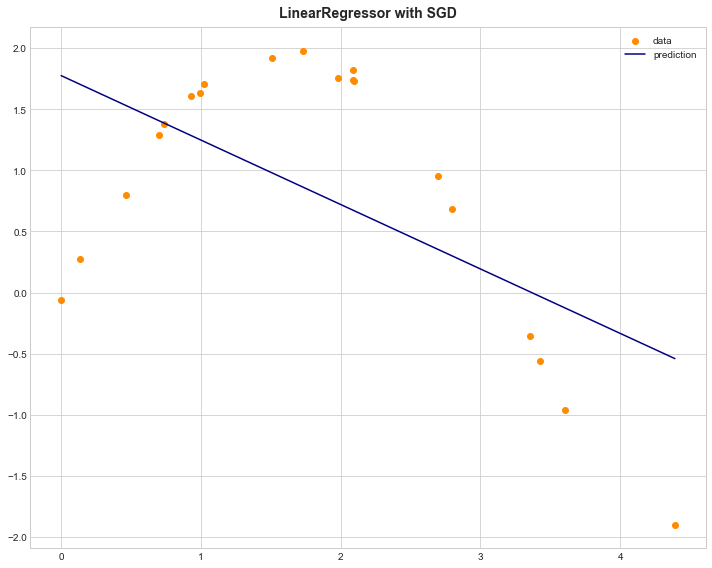

In [6]:
fig = plt.figure(figsize=(10,8))
model = LinearRegressor(method="sgd", epochs=100, eta=0.005)
model.fit(X, y)

y_ = model.predict(T)

plt.scatter(X, y, color="darkorange", label="data")
plt.plot(T, y_, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("LinearRegressor with SGD")
plt.show()

In [7]:
XP = polynomial_features(X, degree=3)
TP = polynomial_features(T, degree=3)

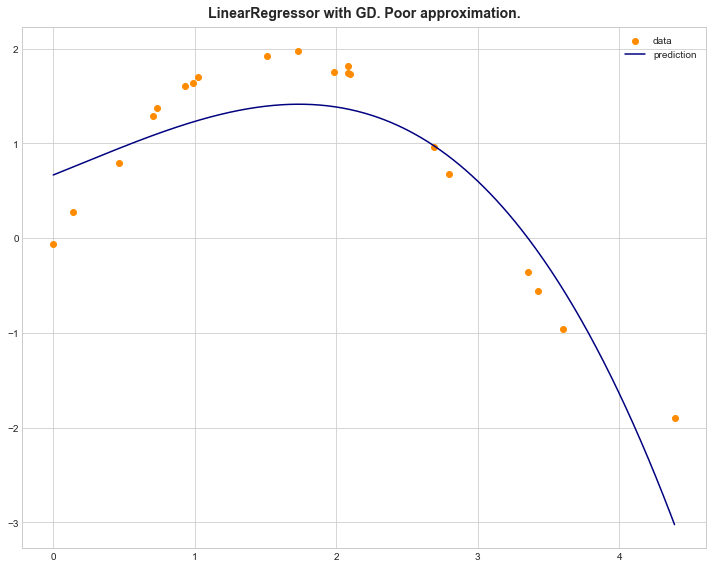

In [8]:
fig = plt.figure(figsize=(10,8))
model = LinearRegressor(method="sgd", epochs=1000, eta=0.0001)
model.fit(XP, y)

y_ = model.predict(TP)

plt.scatter(X, y, color="darkorange", label="data")
plt.plot(T, y_, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("LinearRegressor with GD. Poor approximation.")
plt.show()

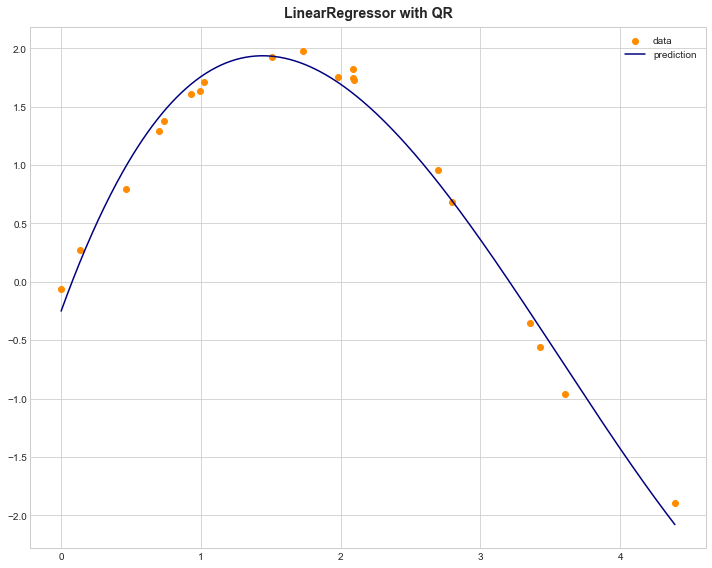

In [9]:
fig = plt.figure(figsize=(10,8))
model = LinearRegressor(method="qr")
model.fit(XP, y)

y_ = model.predict(TP)

plt.scatter(X, y, color="darkorange", label="data")
plt.plot(T, y_, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("LinearRegressor with QR")
plt.show()

In [10]:
np.random.seed(1)
X = np.sort(5 * np.random.rand(10, 1), axis=0)
T = np.linspace(X[0, 0], X[-1, 0], 500)[:, np.newaxis]
y = 2 * np.ravel(np.sin(X))

y[::2] += 1 * (0.5 - np.random.rand(5))

In [11]:
XP = polynomial_features(X, degree=10)
TP = polynomial_features(T, degree=10)

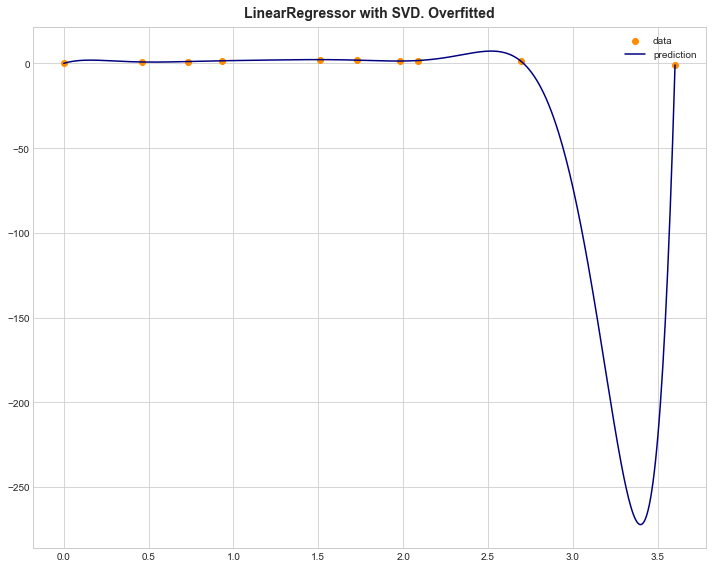

In [12]:
fig = plt.figure(figsize=(10,8))
model = LinearRegressor(method="svd")
model.fit(XP, y)

y_ = model.predict(TP)

plt.scatter(X, y, color="darkorange", label="data")
plt.plot(T, y_, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("LinearRegressor with SVD. Overfitted")
plt.show()

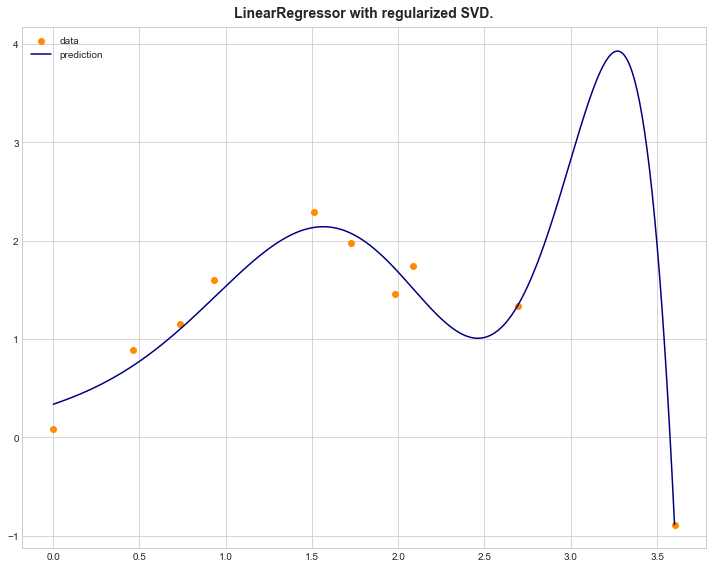

In [17]:
fig = plt.figure(figsize=(10,8))
model = RidgeRegressor(alpha=0.5)
model.fit(XP, y)

y_ = model.predict(TP)

plt.scatter(X, y, color="darkorange", label="data")
plt.plot(T, y_, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("LinearRegressor with regularized SVD.")
plt.show()